In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import os
import datetime

In [2]:
skills = pd.read_csv('job_skills.csv')
postings = pd.read_csv('linkedin_job_postings.csv')

In [3]:
skills.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [4]:
postings.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


In [6]:
skills.dtypes

,0
job_link,object
job_skills,object


In [9]:
skills.index

RangeIndex(start=0, stop=1296381, step=1)

In [10]:
skills.shape[0]

1296381

In [34]:
skills.size

2592762

In [11]:
postings.dtypes

,0
job_link,object
last_processed_time,object
got_summary,object
got_ner,object
is_being_worked,object
job_title,object
company,object
job_location,object
first_seen,object
search_city,object


In [12]:
postings.index

RangeIndex(start=0, stop=1348454, step=1)

In [13]:
postings.shape[0]

1348454

In [33]:
postings.size

14832994

In [14]:
skills.isnull().sum()

,0
job_link,0
job_skills,2085


In [15]:
postings.isnull().sum()

,0
job_link,0
last_processed_time,0
got_summary,0
got_ner,0
is_being_worked,0
job_title,0
company,11
job_location,19
first_seen,0
search_city,0


In [18]:
postings["job_location"].value_counts().head()

,count
job_location,
"New York, NY",13436
"London, England, United Kingdom",11761
"Houston, TX",10999
"Chicago, IL",10790
"Los Angeles, CA",10262


In [20]:
postings["job_location"].value_counts().tail()

,count
job_location,
"Finchville, KY",1
"Budleigh Salterton, England, United Kingdom",1
"Fresno, OH",1
"Chiapa de Corzo, Chiapas, Mexico",1
"Rockwall County, TX",1


In [21]:
postings["company"].value_counts().tail()

,count
company,
PURE ASPHALT COMPANY,1
Moleaer Inc.,1
Focus Forward,1
MG2 Group,1
Morgan State University,1


In [23]:
#deleting unneccesary column
del postings["is_being_worked"]
del postings["got_ner"]
del postings["got_summary"]

In [28]:
skills.duplicated().value_counts()

,count
False,1296381


In [26]:
postings.duplicated(subset=["company","job_link","last_processed_time","job_title","job_location","first_seen","search_city","search_country","search_position","job_level","job_type"]).value_counts()

,count
False,1348454


In [31]:
postings.nunique()

,0
job_link,1348454
last_processed_time,722748
job_title,584544
company,90605
job_location,29153
first_seen,6
search_city,1018
search_country,4
search_position,1993
job_level,2


In [62]:
postings["time"] = pd.to_datetime(postings["last_processed_time"],dayfirst=True, format='mixed')
print(postings["time"])

0         2024-01-21 07:12:29.002560+00:00
1         2024-01-21 07:39:58.881370+00:00
2         2024-01-21 07:40:00.251126+00:00
3         2024-01-21 07:40:00.308133+00:00
4         2024-01-19 09:45:09.215838+00:00
                        ...               
1348449   2024-01-20 15:21:07.786118+00:00
1348450   2024-01-20 15:21:10.885264+00:00
1348451   2024-01-21 07:40:00.304641+00:00
1348452   2024-01-21 00:38:39.816821+00:00
1348453   2024-01-21 00:38:44.231492+00:00
Name: time, Length: 1348454, dtype: datetime64[ns, UTC]


In [35]:
postings.set_index(["job_title","job_location"],inplace=True)
postings

,,job_link,last_processed_time,company,first_seen,search_city,search_country,search_position,job_level,job_type
job_title,job_location,,,,,,,,,
Account Executive - Dispensing (NorCal/Northern Nevada) - Becton Dickinson,"San Diego, CA",https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,BD,2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
Registered Nurse - RN Care Manager,"Norton Shores, MI",https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,Trinity Health MI,2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
RESTAURANT SUPERVISOR - THE FORKLIFT,"Sandy, UT",https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,Wasatch Adaptive Sports,2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
Independent Real Estate Agent,"Englewood Cliffs, NJ",https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,Howard Hanna | Rand Realty,2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
Group/Unit Supervisor (Systems Support Manager TSS),"Chamblee, GA",https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,"IRS, Office of Chief Counsel",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite
...,...,...,...,...,...,...,...,...,...,...
Registered Nurse (RN) #CP-RN-7998660 - 24116274EXPPLAT /,"Providence, RI",https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,TravelNurseSource,2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite
Construction Superintendent,"New Iberia, LA",https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,Jobot,2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite
"Executive Chef, Operations Support","Riverhead, NY",https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,NEXDINE Hospitality,2024-01-14,Eastport,United States,Chef,Mid senior,Onsite


In [36]:
postings.reset_index(inplace=True)

In [37]:
pd.set_option("display.date_dayfirst", True)

In [39]:
postings["time"] = pd.to_datetime(postings["last_processed_time"],dayfirst=True, format='mixed')
print(postings["time"])

0         2024-01-21 07:12:29.002560+00:00
1         2024-01-21 07:39:58.881370+00:00
2         2024-01-21 07:40:00.251126+00:00
3         2024-01-21 07:40:00.308133+00:00
4         2024-01-19 09:45:09.215838+00:00
                        ...               
1348449   2024-01-20 15:21:07.786118+00:00
1348450   2024-01-20 15:21:10.885264+00:00
1348451   2024-01-21 07:40:00.304641+00:00
1348452   2024-01-21 00:38:39.816821+00:00
1348453   2024-01-21 00:38:44.231492+00:00
Name: time, Length: 1348454, dtype: datetime64[ns, UTC]


In [63]:
postings["times"]= pd.to_datetime(postings["time"]).dt.time #using to_datetime to converts time and date

In [40]:
postings.head()

,job_title,job_location,job_link,last_processed_time,company,first_seen,search_city,search_country,search_position,job_level,job_type,time
0,Account Executive - Dispensing (NorCal/Norther...,"San Diego, CA",https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,BD,2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,2024-01-21 07:12:29.002560+00:00
1,Registered Nurse - RN Care Manager,"Norton Shores, MI",https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,Trinity Health MI,2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,2024-01-21 07:39:58.881370+00:00
2,RESTAURANT SUPERVISOR - THE FORKLIFT,"Sandy, UT",https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,Wasatch Adaptive Sports,2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,2024-01-21 07:40:00.251126+00:00
3,Independent Real Estate Agent,"Englewood Cliffs, NJ",https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,Howard Hanna | Rand Realty,2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,2024-01-21 07:40:00.308133+00:00
4,Group/Unit Supervisor (Systems Support Manager...,"Chamblee, GA",https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,"IRS, Office of Chief Counsel",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite,2024-01-19 09:45:09.215838+00:00


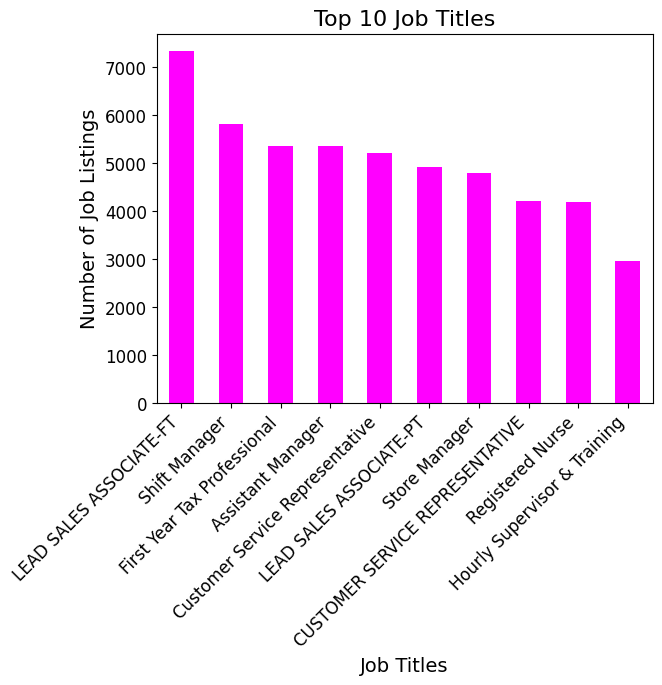

<Figure size 800x1200 with 0 Axes>

In [45]:
top_jobs=postings["job_title"].value_counts().head(10)
top_jobs.plot(kind="bar",color="magenta")
plt.title('Top 10 Job Titles', fontsize=16)
plt.xlabel('Job Titles', fontsize=14)
plt.ylabel('Number of Job Listings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.figure(figsize=(8, 12))
plt.show()

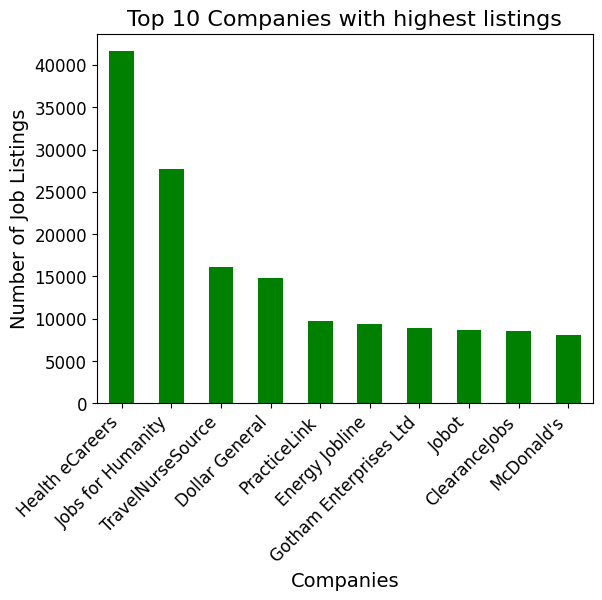

<Figure size 800x1200 with 0 Axes>

In [44]:
top_company = postings["company"].value_counts().head(10)
top_company.plot(kind="bar",color="green")
plt.title('Top 10 Companies with highest listings', fontsize=16)
plt.xlabel('Companies', fontsize=14)
plt.ylabel('Number of Job Listings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.figure(figsize=(8, 12))
plt.show()

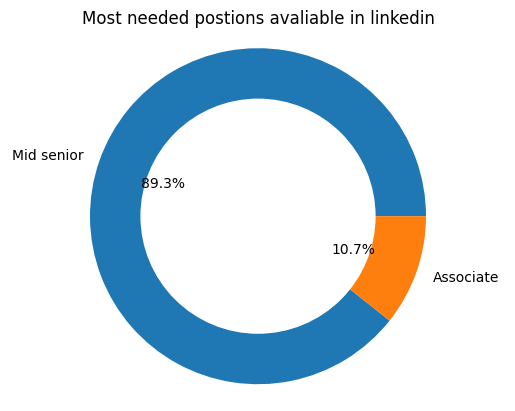

In [55]:
level=postings['job_level'].value_counts()
plt.pie(level,labels=level.index,autopct='%1.1f%%')
cen_cir=plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(cen_cir)
plt.axis('equal')
plt.title('Most needed postions avaliable in linkedin')
plt.show()

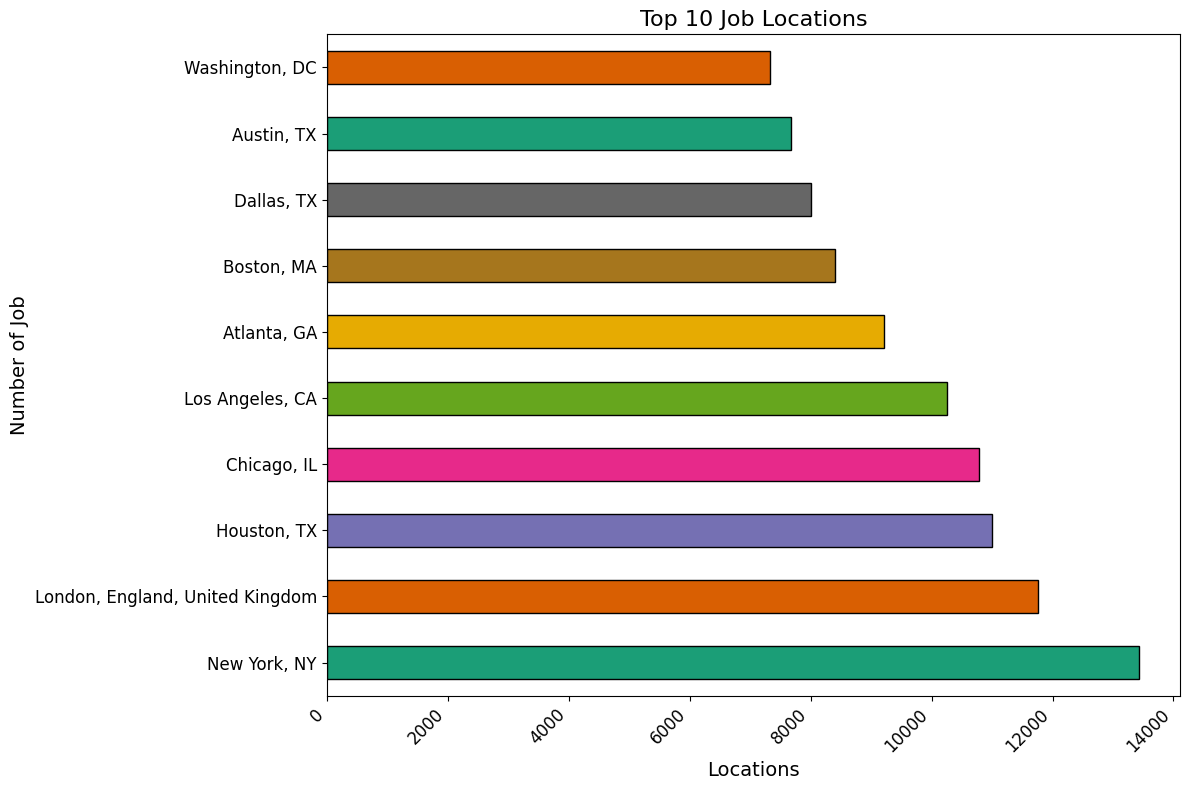

In [57]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Dark2', len(postings['job_location'].unique()))  # You can choose a different color palette

top_loc= postings['job_location'].value_counts().head(10)
top_loc.plot(kind='barh', color=colors, edgecolor='black')

plt.title('Top 10 Job Locations', fontsize=16)
plt.xlabel('Locations', fontsize=14)
plt.ylabel('Number of Job', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

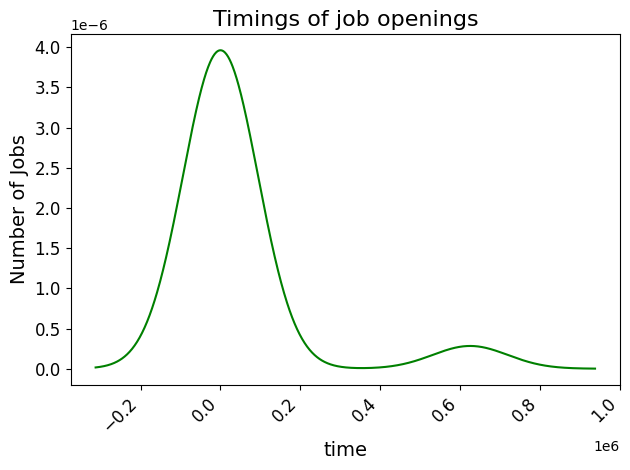

In [64]:
time=postings["times"].value_counts().head(15)
time.plot(kind='kde', color="g")
plt.title('Timings of job openings', fontsize=16)
plt.xlabel('time', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [74]:
from collections import Counter

all_skills = skills["job_skills"].str.split(',').explode().str.strip()

# Count the frequency of each skill
skill_counts = Counter(all_skills)

# Convert to DataFrame for easy manipulation
skill_counts_df = pd.DataFrame(skill_counts.items(), columns=["Skill", "Frequency"])
skill_counts_df = skill_counts_df.sort_values(by="Frequency", ascending=False)


In [81]:
top_skills = skill_counts_df.head(10)

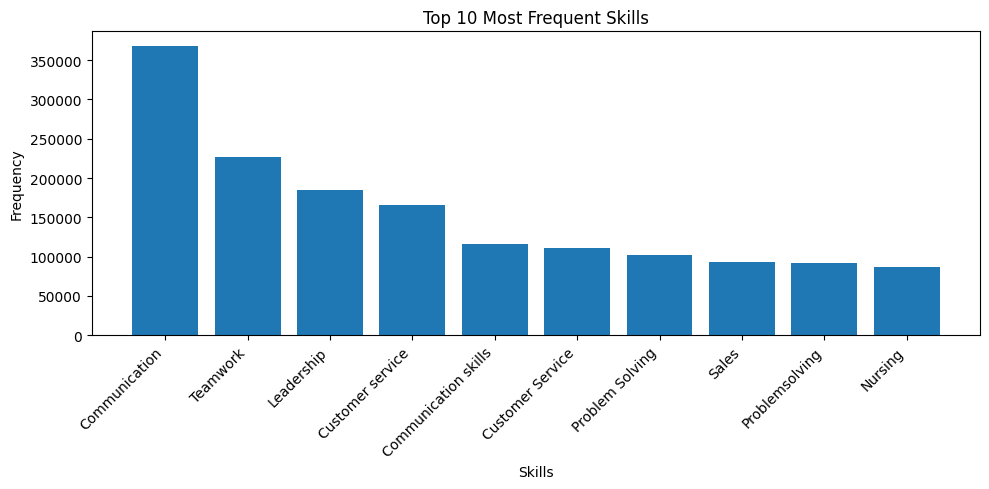

In [79]:
plt.figure(figsize=(10, 5))
plt.bar(top_skills["Skill"], top_skills["Frequency"])
plt.title("Top 10 Most Frequent Skills")
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

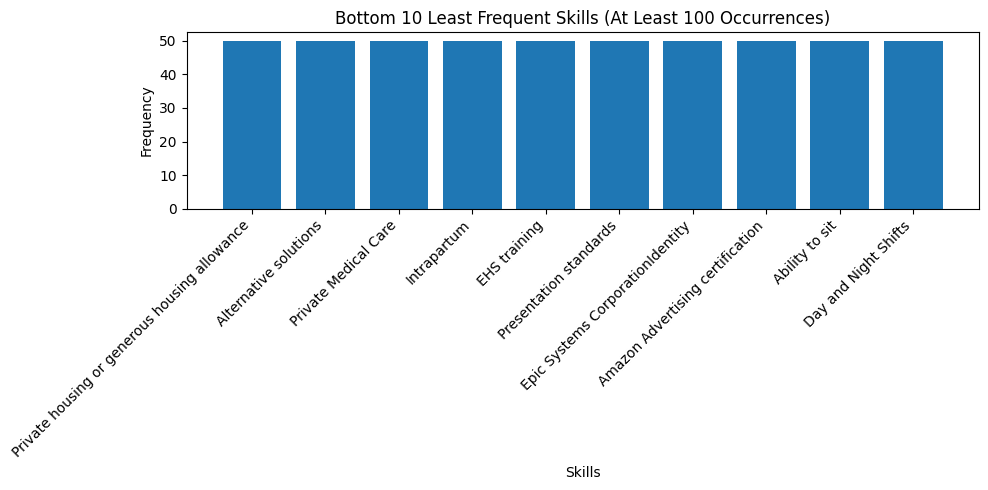

In [83]:
# Filter the skills with at least 100 occurrences
filtered_skills_df = skill_counts_df[skill_counts_df["Frequency"] >= 50]

# Get the bottom 10 skills from the filtered DataFrame
bottom_skills_filtered = filtered_skills_df.tail(10)

# Plotting bottom skills with at least 100 occurrences
plt.figure(figsize=(10, 5))
plt.bar(bottom_skills_filtered["Skill"], bottom_skills_filtered["Frequency"])
plt.title("Bottom 10 Least Frequent Skills (At Least 100 Occurrences)")
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()